<font color='lime'>

# Regression

</font>

<font color='yellow'>

##  Process the initial data

</font> 

<font color='orange'>

### Load necessary libs

</font> 

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

<font color='orange'>

###  Load data

</font>

In [119]:
# Load the dataset
file_path = 'data/spotify_songs.csv'
df = pd.read_csv(file_path)

<font color='orange'>

###  Normalization

</font>

In [120]:
# Selecting numerical columns for normalization
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('track_popularity')  # Removing the target feature

# Normalizing the numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Removing duplicates
df = df.drop_duplicates()

# Removing rows with null values
df = df.dropna()

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from the numerical columns
for col in numerical_cols:
    df = remove_outliers(df, col)

# Verifying the changes
df.shape, df.shape

((31653, 23), (31653, 23))

<font color='orange'>

###  String to float parsing

</font>

In [121]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('track_popularity')  # Exclude the target feature

# Identifying columns that are object type but should be numeric
object_cols = df.select_dtypes(include=['object']).columns

# Columns that could potentially contain numeric values represented as strings
potential_numeric_cols = [col for col in object_cols if df[col].str.replace('.', '', 1).str.isdigit().all()]

# Converting these columns to float
for col in potential_numeric_cols:
    df[col] = df[col].astype(float)

# Normalizing the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Checking the data types to confirm the changes
df.dtypes, potential_numeric_cols

(track_id                     object
 track_name                   object
 track_artist                 object
 track_popularity              int64
 track_album_id               object
 track_album_name             object
 track_album_release_date     object
 playlist_name                object
 playlist_id                  object
 playlist_genre               object
 playlist_subgenre            object
 danceability                float64
 energy                      float64
 key                         float64
 loudness                    float64
 mode                        float64
 speechiness                 float64
 acousticness                float64
 instrumentalness            float64
 liveness                    float64
 valence                     float64
 tempo                       float64
 duration_ms                 float64
 dtype: object,
 [])

<font color='yellow'>

## Metrics for each model

</font> 

<font color='orange'>

### Metrics for each model

</font> 

In [122]:
# Splitting the data into features (X) and target (y)
X = df[numerical_cols]
y = df['track_popularity']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining and training models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

# Dictionary to store predictions
predictions = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Storing predictions
    predictions[name] = model.predict(X_test)

predictions.keys()  # Displaying the keys to confirm models have made predictions

dict_keys(['Linear Regression', 'Lasso', 'Ridge'])

<font color='orange'>

### Metrics for each model

</font> 

In [123]:
model_metrics = {}

for name, preds in predictions.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    model_metrics[name] = {'Mean Squared Error': mse, 'R² Score': r2}

model_metrics

{'Linear Regression': {'Mean Squared Error': 597.3089418089269,
  'R² Score': 0.057017194233990987},
 'Lasso': {'Mean Squared Error': 606.8393937895113,
  'R² Score': 0.04197129131873767},
 'Ridge': {'Mean Squared Error': 597.308445505254,
  'R² Score': 0.057017977757888305}}

<font color='orange'>

### Function to create histograms for actual vs predicted values

</font> 

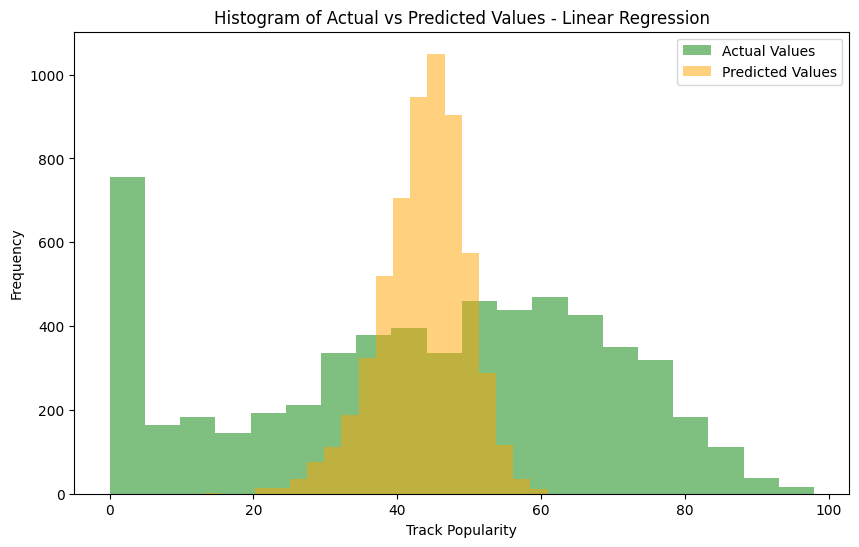

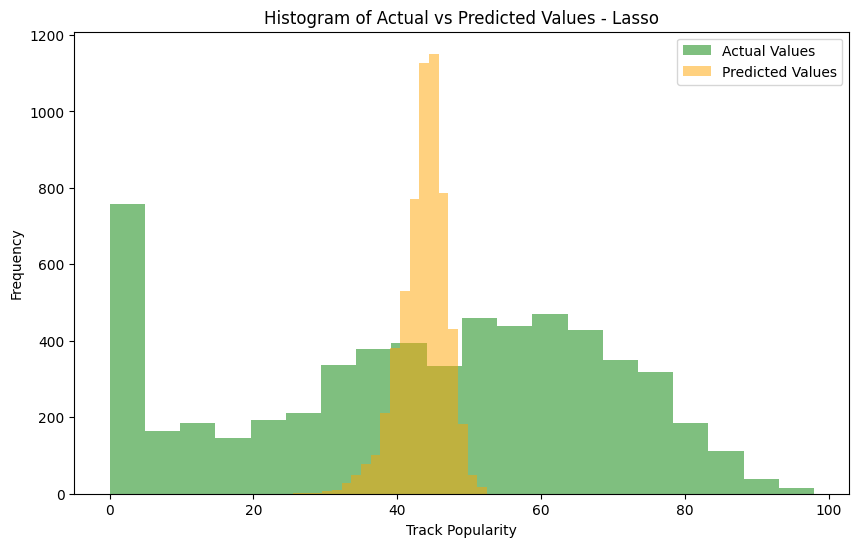

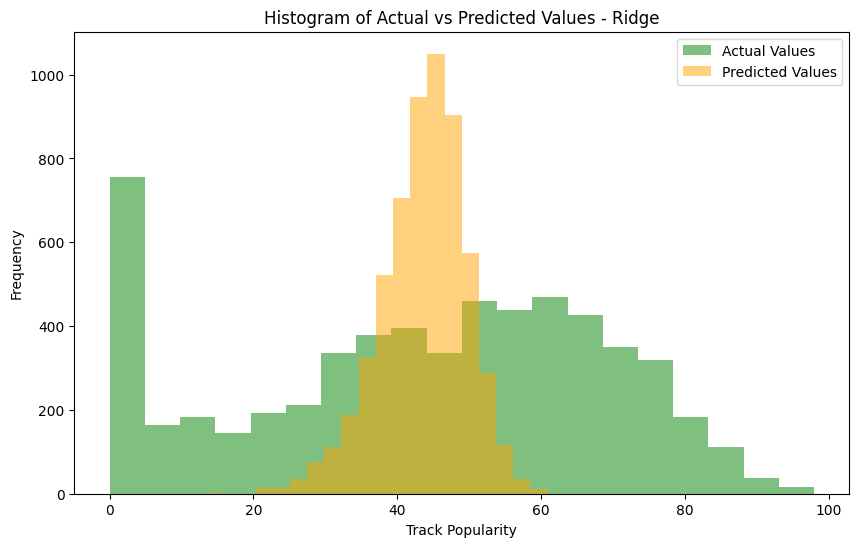

In [124]:
def plot_histograms(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.hist(y_test, bins=20, alpha=0.5, label="Actual Values", color='green')
    plt.hist(predictions[model_name], bins=20, alpha=0.5, label="Predicted Values", color='orange')
    plt.title(f"Histogram of Actual vs Predicted Values - {model_name}")
    plt.xlabel("Track Popularity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

for model_name in predictions:
    plot_histograms(y_test, predictions, model_name)

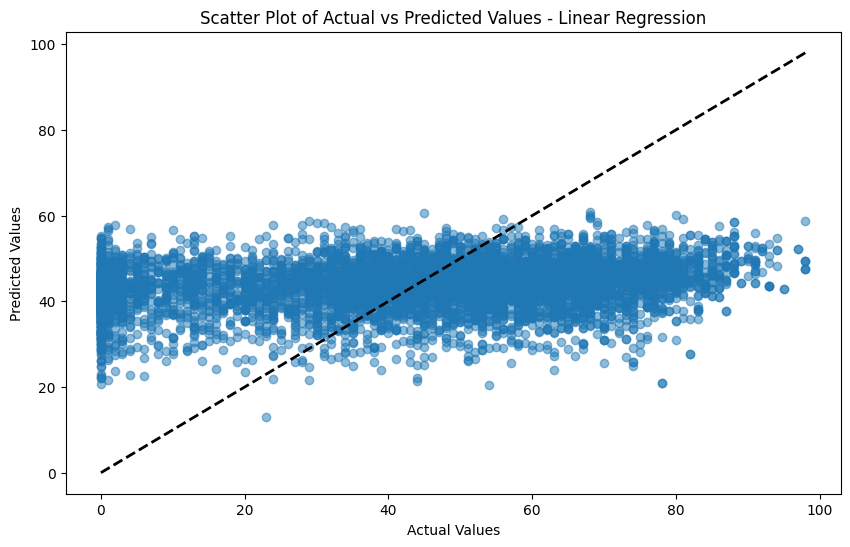

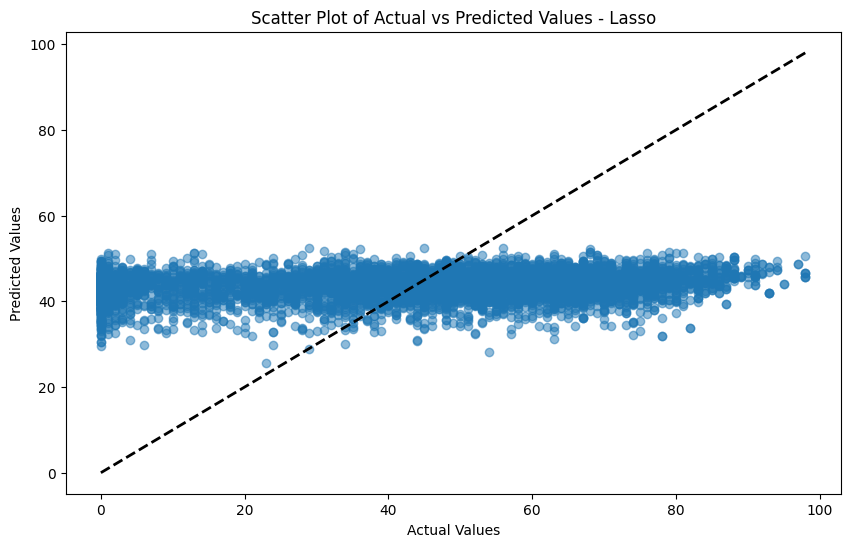

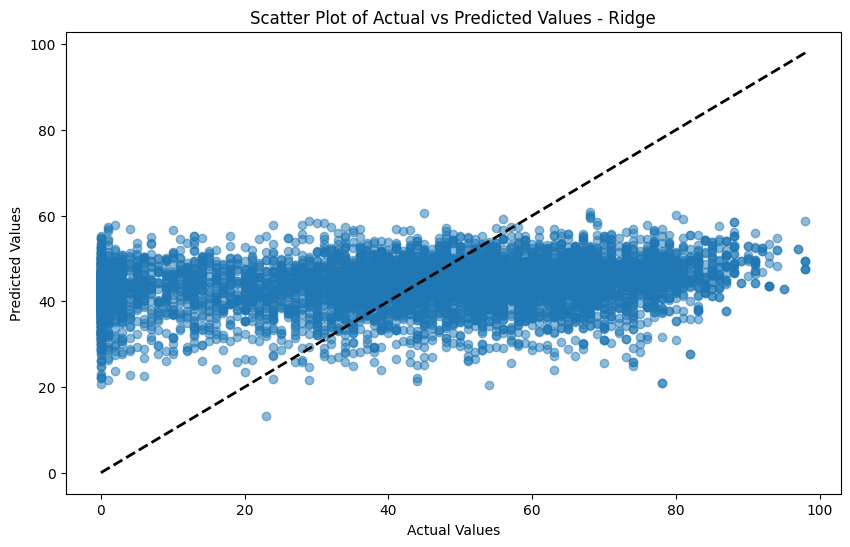

In [125]:
# Splitting the cleaned data into features (X) and target (y)
X_cleaned = df[numerical_cols]
y_cleaned = df['track_popularity']

# Splitting into training and testing sets for cleaned data
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Defining and training models with cleaned data
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}
cleaned_predictions = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train_cleaned, y_train_cleaned)

    # Storing predictions
    cleaned_predictions[name] = model.predict(X_test_cleaned)

# Function to create scatter plots for actual vs predicted values
def plot_scatter(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions[model_name], alpha=0.5)
    plt.title(f"Scatter Plot of Actual vs Predicted Values - {model_name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line
    plt.show()

# Creating scatter plots for each model
for model_name in cleaned_predictions:
    plot_scatter(y_test_cleaned, cleaned_predictions, model_name)